In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction : Présentation de l'exercice
Dans cet exercice, vous allez explorer les données IRIS, un dataset classique utilisé en apprentissage automatique.  Vous apprendrez à charger, visualiser, normaliser les données et à implémenter votre propre algorithme des K plus proches voisins (KNN) sous forme de classe. Vous serez également guidés pour évaluer la performance de votre modèle et interpréter les résultats.
Les objectifs principaux sont :
1. Comprendre les étapes de prétraitement des données.
2. Apprendre à visualiser les données en utilisant Matplotlib.
3. Implémenter un modèle KNN simple sans utiliser de bibliothèques externes.
4. Évaluer la performance de votre modèle en utilisant des métriques comme la précision.

# Étape 1 : Chargement du dataset IRIS
1. Importez le module `load_iris` depuis `sklearn.datasets`.
2. Chargez le dataset IRIS en appelant la fonction `load_iris()` et stockez-le dans une variable (par exemple, `iris`).
3. Extraire les données des caractéristiques (features) sous forme de DataFrame pandas et les stocker dans une variable `X`. Les colonnes du DataFrame doivent correspondre aux noms des caractéristiques disponibles dans `iris['feature_names']`.
4. Extraire les cibles (targets) sous forme de Série pandas et les stocker dans une variable `y`. Assurez-vous que la Série a un nom explicite, par exemple, "target".
5. Affichez un aperçu des données de `X` et `y` en utilisant les méthodes `.head()`.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


# Étape 2 : Préparation des données
Instructions pour les étudiants :
1. Normalisez les données des caractéristiques pour que leurs valeurs soient comprises entre 0 et 1.
2. Suivez les étapes suivantes pour normaliser :
    - Calculez la valeur minimale de chaque caractéristique en utilisant `X.min()`.
    - Calculez la valeur maximale de chaque caractéristique en utilisant `X.max()`.
    - Appliquez la formule de normalisation pour chaque caractéristique :
    normalized_value = (value - min) / (max - min)
    - Remplacez les valeurs de `X` par leurs valeurs normalisées.
3. Une fois la normalisation terminée, affichez un aperçu des données normalisées de `X` en utilisant `.head()`.

In [5]:
def normalize_data(X):
    min_values = X.min()
    max_values = X.max()
    normalized_data = (X - min_values) / (max_values - min_values)
    return normalized_data

Utiliser de la fonction

In [7]:
X = normalize_data(X)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Étape 3 : Visualisation des données avec Matplotlib
Vous allez utiliser Matplotlib pour visualiser la distribution des données. Suivez les étapes ci-dessous :
1. Créez une nouvelle fonction appelée `plot_scatter` qui accepte les paramètres suivants :
    - X : les données d'entrée (features).
    - y : les cibles (targets).
    - feature_x : l'indice de la première caractéristique à tracer.
    - feature_y : l'indice de la seconde caractéristique à tracer.
    - feature_names : la liste des noms des caractéristiques.
    - target_names : la liste des noms des classes cibles.
    - colors : une liste de couleurs correspondant à chaque classe cible.
    - title : le titre du graphique.
2. Utilisez plt.figure pour définir la taille du graphique.
3. Parcourez chaque classe cible (0, 1, 2) et :
    - Sélectionnez les lignes de X où y correspond à la classe actuelle.
    - Tracez un nuage de points (scatter) pour les deux caractéristiques sélectionnées, en utilisant une couleur spécifique pour chaque classe.
4. Ajoutez des étiquettes pour les axes x et y en utilisant plt.xlabel et plt.ylabel.
5. Ajoutez un titre avec plt.title et une légende avec plt.legend.
6. Affichez le graphique en utilisant plt.show.

In [8]:
def plot_scatter(X, y, feature_x, feature_y, feature_names, target_names, colors, title):

    plt.figure(figsize=(9, 6))


    for i in range(len(target_names)):
        tab = (y == i)                  #Permet de créer une série de boolean en fonction de si y correspond à la classe actuelle

        plt.scatter(
            X.loc[tab, X.columns[feature_x]],  #.loc permet de filtrer, on selectionne les lignes égalent à True dans la colonne feature_X
            X.loc[tab, X.columns[feature_y]],  #Pareil mais pour feature_y
            label=target_names[i],
            color=colors[i]
        )

    plt.xlabel(feature_names[feature_x])
    plt.ylabel(feature_names[feature_y])

    plt.title(title)
    plt.legend()

    plt.show()

Créez la liste des couleurs, des noms de caractéristiques et des noms des classes

In [9]:
feature_names = iris["feature_names"]
target_names = iris["target_names"]
colors = ['red', 'green', 'blue']

Visualisation de "sepal length (cm)" vs "sepal width (cm)"

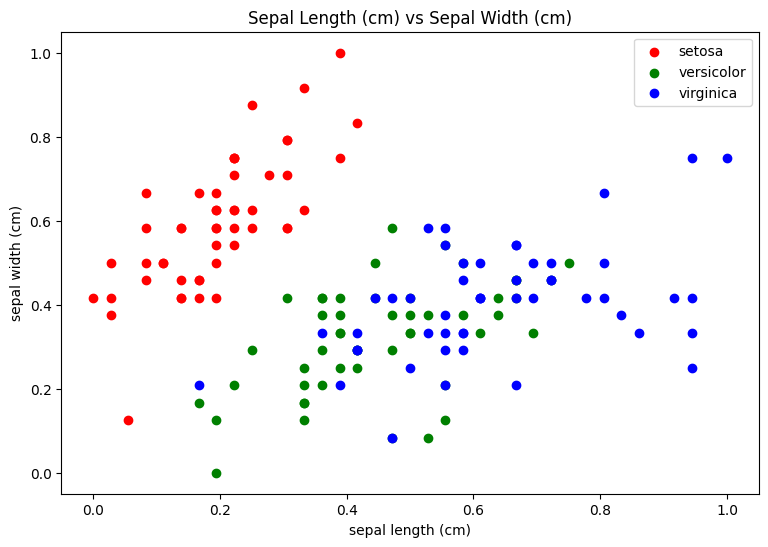

In [11]:
plot_scatter(X, y, 0, 1, feature_names, target_names, colors, "Sepal Length (cm) vs Sepal Width (cm)")

# 0 = sepal length (cm)
# 1 = sepal width (cm)
# 2 = petal length (cm)
# 3 = petal width (cm)

Visualisation de "petal length (cm)" vs "petal width (cm)"

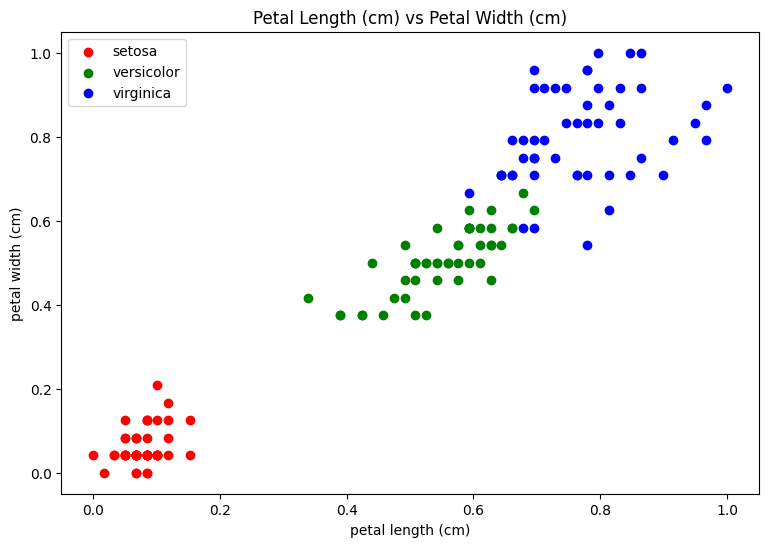

In [12]:
plot_scatter(X, y, 2, 3, feature_names, target_names, colors, "Petal Length (cm) vs Petal Width (cm)")

Visualisation croisée de "sepal length (cm)" vs "petal length (cm)"

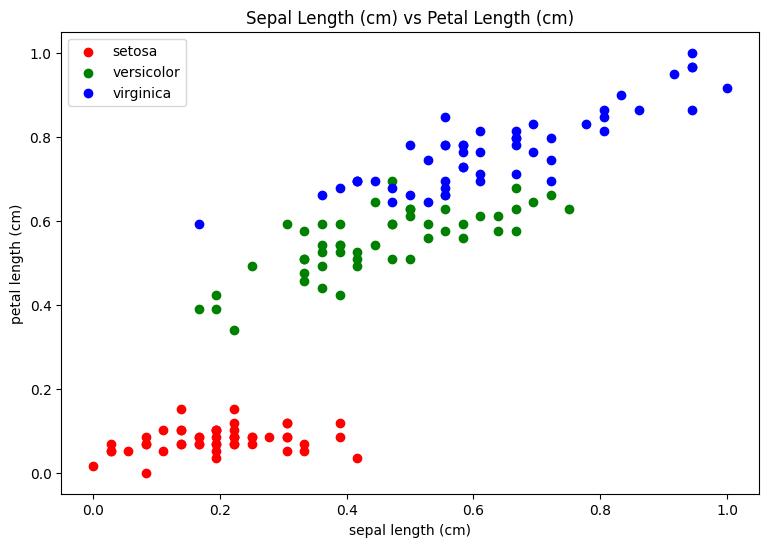

In [13]:
plot_scatter(X, y, 0, 2, feature_names, target_names, colors, "Sepal Length (cm) vs Petal Length (cm)")

Visualisation croisée de "sepal width (cm)" vs "petal width (cm)"

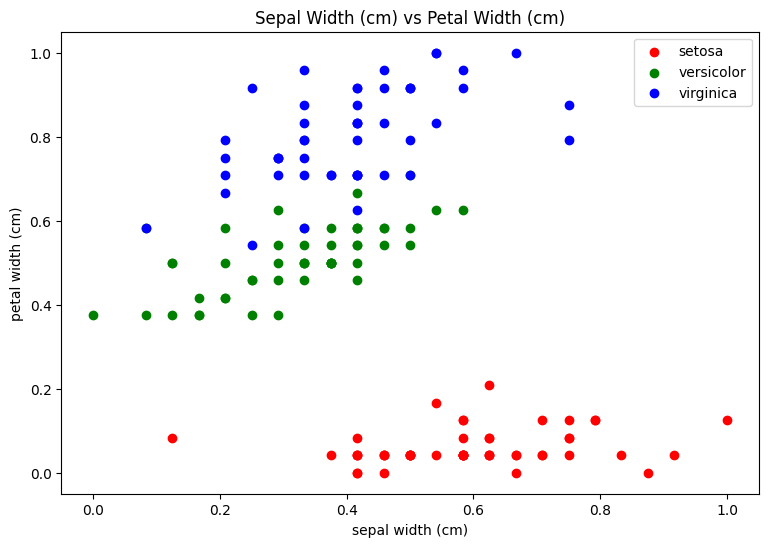

In [14]:
plot_scatter(X, y, 1, 3, feature_names, target_names, colors, "Sepal Width (cm) vs Petal Width (cm)")

# Étape 4 : Visualisation des histogrammes par caractéristique et par classe
Vous allez implémenter une fonction appelée `plot_histograms_by_target` qui affiche un histogramme de la distribution des valeurs pour chaque caractéristique, groupées par classe cible. Suivez les étapes ci-dessous :
1. Créez une fonction nommée plot_histograms_by_target acceptant les arguments suivants :
    - X : un DataFrame contenant les caractéristiques.
    - y : une Série ou un tableau contenant les cibles.
    - feature_names : une liste des noms des caractéristiques.
    - target_names : une liste des noms des classes cibles.
    - colors : une liste des couleurs associées à chaque classe.
2. Dans la fonction, pour chaque caractéristique (parcourue à l'aide de feature_names) :
    - Créez une figure avec plt.figure.
    - Parcourez chaque classe cible et :
      - Sélectionnez les lignes de X correspondant à cette classe.
      - Tracez un histogramme pour la caractéristique courante avec plt.hist, en utilisant une couleur spécifique.
    - Ajoutez des étiquettes pour les axes, un titre pour l'histogramme, et une légende pour indiquer les classes.
3. Appelez cette fonction avec les données fournies pour générer les histogrammes.

In [15]:
def plot_histograms_by_target(X, y, feature_names, target_names, colors):
    for caracteristique in feature_names:
        plt.figure(figsize=(8, 6))

        for i in range(len(target_names)):
          tab = (y == i)

          plt.hist(
              X.loc[tab, caracteristique],
              label=target_names[i],
              color=colors[i],
              alpha = 0.6
          )

        plt.xlabel(caracteristique)
        plt.ylabel('Fréquence')
        plt.title('Distribution des valeurs de ' + str(caracteristique))
        plt.legend()

        plt.show()

Apeller de la fonction pour tracer les histogrammes

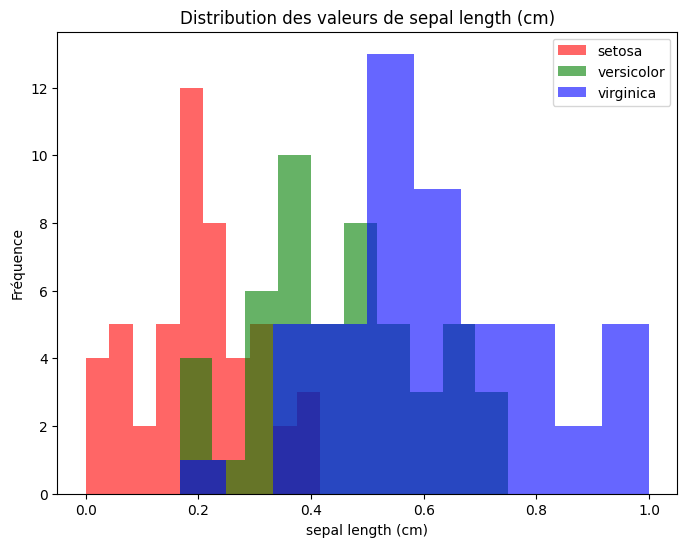

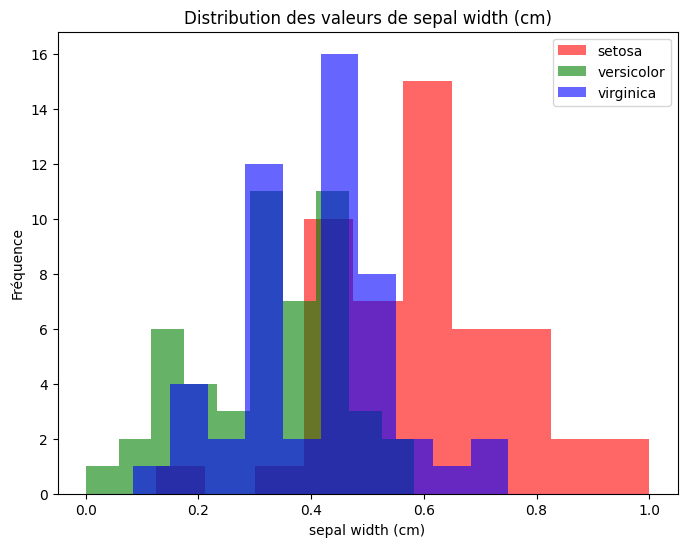

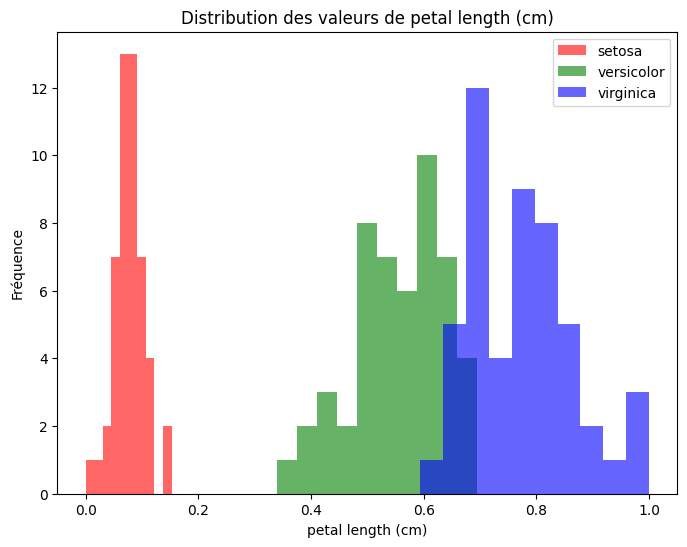

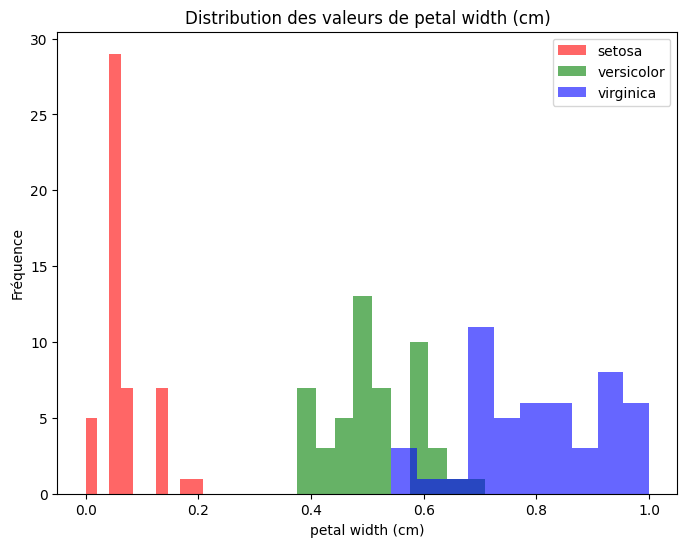

In [16]:
plot_histograms_by_target(X, y, iris.feature_names, target_names, colors)

# Étape 5 : Implémentation de l'algorithme des KNN sous forme de classe
Implémentez une classe `KNNClassifier` qui inclut les méthodes suivantes :
- __init__(self, k) : pour initialiser le nombre de voisins k.
- fit(self, X_train, y_train) : pour stocker les données d'entraînement.
- predict(self, X_test) : pour prédire les classes des données test en suivant ces étapes :
   1. Pour chaque point de test, calculer la distance à chaque point d'entraînement.
      Cette distance doit être calculée à l'aide d'une méthode privée comme suit :
      distance = sqrt((x1 - x2)^2 + (y1 - y2)^2 + ...).
   2. Identifier les k voisins les plus proches en triant les distances.
   3. Déterminer la classe majoritaire parmi les k voisins et l'assigner au point de test.

In [17]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
      result = []

      for i in range(len(X_test)):
        distances = []

        for j in range(len(self.X_train)):
          distance = np.sqrt(np.sum((X_test.iloc[i] - self.X_train.iloc[j])**2))
          distances.append((distance, self.y_train.iloc[j])) #On ajoute ici aussi la classe associée pour pouvoir la récupérer par la suite

        distances.sort()
        k_voisins_proches = distances[:self.k]

        k_classes = [voisin[1] for voisin in k_voisins_proches] #Ici on parcourt les voisins les plus proches pour garder seulement leur classe dans une nouvelle liste

        nb_apparitions = {} #Dictionnaire pour associer à une classe son nombre d'apparition

        for classe in k_classes:
            if classe in nb_apparitions:
                nb_apparitions[classe] += 1
            else:
                nb_apparitions[classe] = 1

        classe_majoritaire = None
        max_count = 0
        for classe, count in nb_apparitions.items(): #Chercher la classe ayant le plus grand nombre d'apparition
            if count > max_count:
                max_count = count
                classe_majoritaire = classe

        result.append(classe_majoritaire) #On l'ajoute a la liste des prédictions

      return result

# Étape 6 : Utilisation du modèle
1. Initialiser du classificateur avec k=3
2. En utilisant la fonction `train_test_split` qui se trouve dans la bibliothèque `sklearn.model_selection`, séparer le dataset X & y en un dataset d'entrainement `X_train` & `y_train` et un dataset de test `X_test` & `y_test`.
3. Entrainer le modèle avec les données d'entrainement
4. Effectuer les prédictions sur les données de test.
5. Afficher les prédictions réalisées avec la vérité terrain

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
Test = KNNClassifier(3)

Test.fit(X_train, y_train)
y_pred = Test.predict(X_test)


df = pd.DataFrame({
    'Vérité terrain (y_test)': y_test.values,
    'Prédictions (y_pred)': y_pred
})

df

,Vérité terrain (y_test),Prédictions (y_pred)
0,0,0
1,2,2
2,0,0
3,2,2
4,1,1
5,0,0
6,0,0
7,0,0
8,2,2
9,0,0


# Étape 7 : Evaluation du modèle
Implémentez une fonction `calculate_accuracy` qui calcule la précision d'un modèle.
 - La fonction prend deux arguments :
   1. y_true : les vraies classes sous forme de liste ou tableau.
   2. y_pred : les classes prédites sous forme de liste ou tableau.
 - La fonction retourne un nombre entre 0 et 1 représentant la proportion des prédictions correctes.
 - Étapes à suivre :
   1. Initialiser un compteur à 0 pour les prédictions correctes.
   2. Parcourir les deux listes en parallèle (y_true et y_pred).
   3. Incrémenter le compteur à chaque fois que les deux valeurs correspondantes sont égales.
   4. Diviser le compteur par la longueur de y_true pour obtenir la précision.

In [19]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_predictions += 1
    return correct_predictions / len(y_true)

Afficher la précision du modèle sur l'ensemble de test

In [20]:
print(calculate_accuracy(y_test.values, y_pred))

0.9736842105263158


# Pour les plus rapides (à faire à la maison)
1. Modifier le notebook (après l'avoir dupliqué!) pour explorer le dataset wine (load_wine dans sklearn.dataset).
2. Créer une classe `KNNRegressor`, en vous appuyant sur le code que vous avez précédemment réalisé. Un régresseur permet de trouver un valeur numérique (entier ou réel) à la place d'une classe. Instructions
    - le mécanisme de recherche des k plus proche voisin est le même
    - à la place de faire un vote à la majorité, on calcule et retourne la moyenne des k points les plus proches de la donnée à prédire
    - tester sur le dataset diabetes (toujours dans sklearn.dataset)
    - l'évaluation se fait en calculant la moyenne des erreurs absolues entre la prédiction et la vérité terrain